# 01: Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02: Contents

Data Import
Create Region variable
Exclude Low Activity
Create Customer Profiles and Visualizations
Aggregate Metrics
Customer Profile Comparisons

# 03: Data Import

In [2]:
path = r'C:\Users\14239\Downloads\Personal\Instacart Basket Analysis'

In [3]:
# Import ord_prod_cust_merge

ord_prod_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prod_cust_merge.pkl'))

In [4]:
# Create region list

Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','New Jersey','Pennsylvania']

In [5]:
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [6]:
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [7]:
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [8]:
# Add conditions and values for new column

cond = [ord_prod_cust_merge['State'].isin(Northeast), ord_prod_cust_merge['State'].isin(Midwest), ord_prod_cust_merge['State'].isin(South), ord_prod_cust_merge['State'].isin(West)]

In [9]:
values = ['Northeast','Midwest','South','West']

In [10]:
# Add Region column

ord_prod_cust_merge['Region'] = np.select(cond,values)

In [11]:
crosstab = pd.crosstab(ord_prod_cust_merge['Region'], ord_prod_cust_merge['loyalty_flag'], dropna = False)

In [12]:
crosstab

loyalty_flag,High Spender,Low Spender
Region,,
Midwest,156084,7447932
Northeast,108276,5620168
South,209878,10592104
West,160440,8140177


In [11]:
# Create order activity flag

ord_prod_cust_merge.loc[ord_prod_cust_merge['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [12]:
ord_prod_cust_merge.loc[ord_prod_cust_merge['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [13]:
ord_prod_cust_merge['activity_flag'].value_counts(dropna = False)

Normal activity    30993489
Low activity        1441570
Name: activity_flag, dtype: int64

In [5]:
# Export as Pickle file

ord_prod_cust_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prod_cust_merge_act.pkl'))

In [39]:
# Import departments data

dept = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [8]:
dept.head(10)

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [40]:
dept.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [41]:
df_dept = dept.T

In [42]:
df_dept

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [43]:
df_dept.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [44]:
# Take the first row of df_dep_t for the header

new_header = df_dept.iloc[0]

In [45]:
new_header

0    department
Name: department_id, dtype: object

In [46]:
df_dept_new = df_dept[1:]

In [47]:
df_dept_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [48]:
df_dept_new.columns = new_header

In [49]:
df_dept_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [50]:
data_dict = df_dept_new.to_dict('index')

In [51]:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [14]:
df = ord_prod_cust_merge

In [15]:
# Create Age Ranges

df.loc[(df['Age'] >= 18) & (df['Age'] <= 25), 'Age Range'] = '18-25'

In [16]:
df.loc[(df['Age'] >= 26) & (df['Age'] <= 40), 'Age Range'] = '26-40'

In [17]:
df.loc[(df['Age'] >= 41) & (df['Age'] <= 55), 'Age Range'] = '41-55'

In [18]:
df.loc[(df['Age'] >= 56) & (df['Age'] <= 70), 'Age Range'] = '56-70'

In [19]:
df.loc[df['Age'] > 70, 'Age Range'] = 'Over 70'

In [20]:
df['Age Range'].value_counts(dropna = False)

41-55      7649935
26-40      7631727
56-70      7521199
Over 70    5583062
18-25      4049136
Name: Age Range, dtype: int64

In [21]:
# Create Income Ranges

df.loc[df['income'] < 50000, 'Income Range'] = 'Less than 50k'

In [22]:
df.loc[(df['income'] >= 51000) & (df['income'] <= 75000), 'Income Range'] = '51k - 75k'

In [23]:
df.loc[(df['income'] >= 76000) & (df['income'] <= 100000), 'Income Range'] = '76k - 100k'

In [24]:
df.loc[(df['income'] >= 101000) & (df['income'] <= 150000), 'Income Range'] = '101k - 150k'

In [25]:
df.loc[df['income'] > 150000, 'Income Range'] = 'More than 510k'

In [26]:
df['Income Range'].value_counts(dropna = False)

101k - 150k       10368347
76k - 100k         6931665
51k - 75k          6723914
More than 510k     4054496
Less than 50k      3597945
NaN                 758692
Name: Income Range, dtype: int64

In [27]:
df['fam_status'].value_counts(dropna = False)

married                             22777499
single                               5330885
divorced/widowed                     2774460
living with parents and siblings     1552215
Name: fam_status, dtype: int64

In [28]:
df.loc[(df['fam_status'].isin(['single','divorced/widowed'])) & (df['dependants'].isin([1,2,3,4,5,6,7,8,9])),'Family Customer Profile'] = "Single Parent"

In [29]:
df.loc[(df['fam_status'].isin(['single'])) & (df['dependants'].isin([0])),'Family Customer Profile'] = "Single Adult"

In [30]:
df.loc[(df['fam_status'].isin(['married'])) & (df['dependants'].isin([1,2,3,4,5,6,7,8,9])) & (df['Income Range'].isin(['Less than 50k'])), 'Family Customer Profile'] = "Lower Class Family"

In [31]:
df.loc[(df['fam_status'].isin(['married'])) & (df['dependants'].isin([1,2,3,4,5,6,7,8,9])) & (df['Income Range'].isin(['51k - 75k','76k - 100k','101k - 150k'])), 'Family Customer Profile'] = "Middle Class Family"

In [32]:
df.loc[(df['fam_status'].isin(['married'])) & (df['dependants'].isin([1,2,3,4,5,6,7,8,9])) & (df['Income Range'].isin(['More than 510k'])), 'Family Customer Profile'] = "Upper Class Family"

In [33]:
df['Family Customer Profile'].value_counts(dropna = False)

Middle Class Family    16792518
Single Adult            5330885
NaN                     4850917
Upper Class Family      3003468
Lower Class Family      2457271
Name: Family Customer Profile, dtype: int64

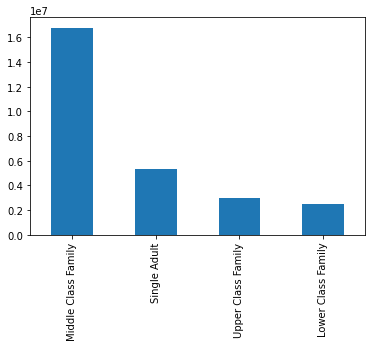

In [42]:
# Create bar graph for distribution of family-types

bar1 = df_fam_bar['Family Customer Profile'].value_counts().plot.bar()

In [43]:
# Export bar graph

bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_cust_prof.png'))

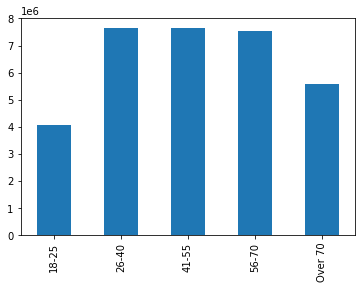

In [88]:
# Create bar graph for distribution of age range

bar2 = df['Age Range'].value_counts().sort_index().plot.bar()

In [89]:
# Export bar graph

bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_cust_prof.png'))

<AxesSubplot:>

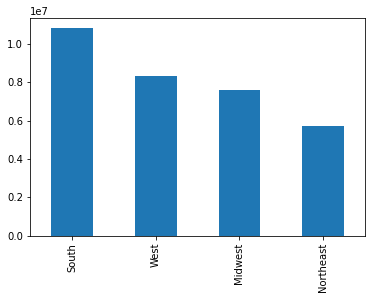

In [44]:
df['Region'].value_counts().plot.bar()

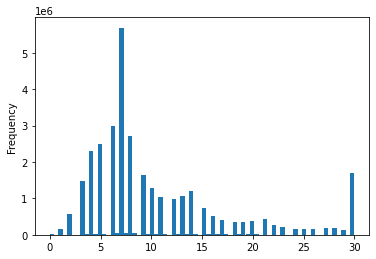

In [47]:
# Histogram showing frequency of orders

hist3 = df['days_since_prior_order'].plot.hist(bins = 70)

In [48]:
hist3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_dspo.png'))

<AxesSubplot:xlabel='days_since_prior_order', ylabel='Age'>

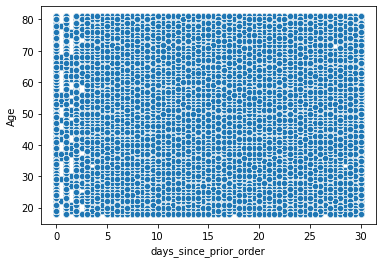

In [49]:
sns.scatterplot(x = 'days_since_prior_order', y = 'Age',data = ord_prod_cust_merge)

In [34]:
crosstab2 = pd.crosstab(df['fam_status'], df['days_since_prior_order'], dropna = False)

In [35]:
crosstab2

days_since_prior_order,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0
fam_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,9124,19,10341,151,48789,319,137336,703,204599,1692,...,427,12477,206,15334,307,19362,571,12208,560,143165
living with parents and siblings,2190,0,8884,33,24733,46,68925,575,125050,1303,...,504,8970,233,7326,447,9326,306,7850,430,78649
married,17881,205,110200,857,392185,6602,1030235,8281,1613290,21676,...,5596,115345,3726,121860,3768,136922,4397,97959,3032,1189213
single,5042,35,22426,17,95792,387,245936,2131,372552,3891,...,1198,25415,1316,29117,1188,34560,1507,19171,995,273605


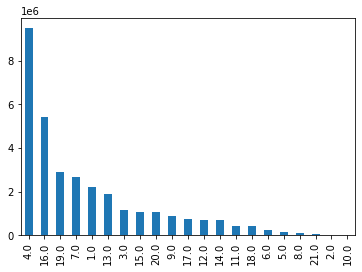

In [54]:
bar4 = df['department_id'].value_counts().plot.bar()

In [52]:
df_dept_new.head()

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [35]:
df.loc[df['department_id'] == 1, 'Department'] = "frozen"

In [36]:
df.loc[df['department_id'] == 2, 'Department'] = "other"

In [37]:
df.loc[df['department_id'] == 3, 'Department'] = "bakery"

In [38]:
df.loc[df['department_id'] == 4, 'Department'] = "produce"

In [39]:
df.loc[df['department_id'] == 5, 'Department'] = "alcohol"

In [40]:
df.loc[df['department_id'] == 6, 'Department'] = "international"

In [41]:
df.loc[df['department_id'] == 7, 'Department'] = "beverages"

In [42]:
df.loc[df['department_id'] == 8, 'Department'] = "pets"

In [43]:
df.loc[df['department_id'] == 9, 'Department'] = "dry goods pasta"

In [44]:
df.loc[df['department_id'] == 10, 'Department'] = "bulk"

In [45]:
df.loc[df['department_id'] == 11, 'Department'] = "personal care"

In [46]:
df.loc[df['department_id'] == 12, 'Department'] = "meat seafood"

In [47]:
df.loc[df['department_id'] == 13, 'Department'] = "pantry"

In [48]:
df.loc[df['department_id'] == 14, 'Department'] = "breakfast"

In [49]:
df.loc[df['department_id'] == 15, 'Department'] = "canned goods"

In [50]:
df.loc[df['department_id'] == 16, 'Department'] = "dairy eggs"

In [51]:
df.loc[df['department_id'] == 17, 'Department'] = "household"

In [52]:
df.loc[df['department_id'] == 18, 'Department'] = "babies"

In [53]:
df.loc[df['department_id'] == 19, 'Department'] = "snacks"

In [54]:
df.loc[df['department_id'] == 20, 'Department'] = "deli"

In [55]:
df.loc[df['department_id'] == 21, 'Department'] = "missing"

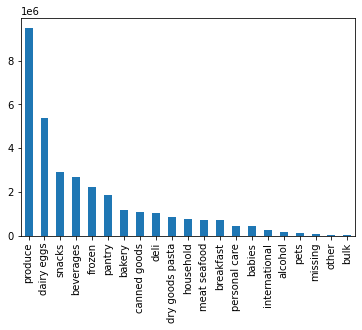

In [80]:
bar5 = df['Department'].value_counts().plot.bar()

In [81]:
# Export bar graph

bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_freq.png'))

In [ ]:
crosstab3 = pd.crosstab(df['loyalty_flag2'], df['loyalty_flag'], dropna = False)

In [86]:
crosstab3

loyalty_flag,High Spender,Low Spender
loyalty_flag2,,
Loyal customer,216809,10077218
New customer,114925,6134600
Regular customer,302944,15588563


In [57]:
# Agg Metrics Customer Profile Usage Expenditure

df.groupby('Family Customer Profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                              mean  min      max
Family Customer Profile                         
Lower Class Family        6.676529  1.0     25.0
Middle Class Family       9.286114  1.0  99999.0
Single Adult             12.480849  1.0  99999.0
Upper Class Family       32.186799  1.0  99999.0

In [59]:
# Agg Metrics Customer Profile Usage Frequency

df.groupby('Family Customer Profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                          mean  min   max
Family Customer Profile                                  
Lower Class Family                   11.148438  0.0  30.0
Middle Class Family                  10.343750  0.0  30.0
Single Adult                         10.398438  0.0  30.0
Upper Class Family                   10.226562  0.0  30.0

In [60]:
# Comparing customer profile by region

crosstab4 = pd.crosstab(df['Region'], df['Family Customer Profile'], dropna = False)

In [61]:
crosstab4

Family Customer Profile,Lower Class Family,Middle Class Family,Single Adult,Upper Class Family
Region,,,,
Midwest,579577,3904363,1260037,716469
Northeast,427189,2996366,918159,525824
South,829661,5578866,1782662,989726
West,620844,4312923,1370027,771449


In [63]:
# Comparing customer profile by department

crosstab5 = pd.crosstab(df['Department'], df['Family Customer Profile'], dropna = False)

In [64]:
crosstab5

Family Customer Profile,Lower Class Family,Middle Class Family,Single Adult,Upper Class Family
Department,,,,
alcohol,13514,71569,26503,18167
babies,21103,228847,71168,39588
bakery,78762,609857,194004,114632
beverages,279604,1325299,443417,241329
breakfast,66644,350801,115079,64751
bulk,3472,17828,5513,2778
canned goods,58621,572663,175579,103247
dairy eggs,361348,2835812,887451,506126
deli,77162,544328,174327,97440


In [67]:
crosstab6 = pd.crosstab(df['Region'], df['days_since_prior_order'], dropna = False)

In [69]:
df.groupby('Region').agg({'days_since_prior_order': ['mean']})

,days_since_prior_order
,mean
Region,
Midwest,10.460938
Northeast,10.375000
South,10.398438
West,10.359375


In [65]:
# Export df as final_data.pkl

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_data.pkl'))